In [83]:
import pandas as pd

In [ ]:
originalFile = 'pornhub.com-db.csv'

Shrink large dataset

In [84]:
# originalDataset = pd.read_csv(originalFile, chunksize=100000, iterator=True, on_bad_lines='skip')
# for idx, chunk in enumerate(originalDataset):
    # chunk.to_csv(f'pornhub.com-db-shrinked{idx}-0.csv', mode='a', header=False, index=False) 

In [ ]:
columns = ['embed','thumbnail','thumbnail2','title','tags','categories','pornstars','duration','views','likes','dislikes','thumbnail3','thumbnail4']

In [85]:
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0.csv', delimiter='|', on_bad_lines='skip', columns=columns)
# dataset.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', mode='a', header=False, index=False)
dataset = pd.read_csv('pornhub.com-db-shrinked1-0-fixed.csv', delimiter='|', on_bad_lines='skip')

In [86]:
len(dataset)

99485

Data cleaning & processing

In [87]:
# from collections import Counter
# count = Counter()
# for i in range(len(dataset)):
#     count[len(dataset.iloc[i].embed.split('|'))] += 1
# count

In [88]:
# datasetValidation = [len(dataset.iloc[i].embed.split('|')) == 13 for i in range(len(dataset))]
# dataset = dataset[datasetValidation]

In [89]:
# datasetFixed = pd.DataFrame([dataset.iloc[i].embed.split('|') for i in range(1, len(dataset))], columns=dataset.iloc[0].embed.split('|'))

In [90]:
# datasetFixed.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', index=False, header=True, sep='|')

Data quality check

In [91]:
import seaborn as sns
from collections import Counter
%matplotlib inline

In [92]:
dataset.columns, len(dataset.columns)

(Index(['embed', 'thumbnail', 'thumbnail2', 'title', 'tags', 'categories',
        'pornstars', 'duration', 'views', 'likes', 'dislikes', 'thumbnail3',
        'thumbnail4'],
       dtype='object'),
 13)

In [93]:
dataset.head()

,embed,thumbnail,thumbnail2,title,tags,categories,pornstars,duration,views,likes,dislikes,thumbnail3,thumbnail4
0,"<iframe src=""https://www.pornhub.com/embed/110...",https://di.phncdn.com/videos/201312/29/2142343...,https://di.phncdn.com/videos/201312/29/2142343...,Sexy teen fucked by her masseur,teenmegaworld;teens;young;tricky-masseur;blond...,Pornstar;Teen (18+);Small Tits;Massage,Milana Fox,406,336754,526.0,211.0,https://di.phncdn.com/videos/201312/29/2142343...,https://di.phncdn.com/videos/201312/29/2142343...
1,"<iframe src=""https://www.pornhub.com/embed/641...",https://di.phncdn.com/videos/201312/30/2142671...,https://di.phncdn.com/videos/201312/30/2142671...,Fisting in her pussy and ass,filthyandfisting;european;girl-on-girl;lesbian...,Fisting;Lesbian;Euro,Bonny Bon,886,17474,48.0,15.0,https://di.phncdn.com/videos/201312/30/2142671...,https://di.phncdn.com/videos/201312/30/2142671...
2,"<iframe src=""https://www.pornhub.com/embed/639...",https://di.phncdn.com/videos/201312/30/2142698...,https://di.phncdn.com/videos/201312/30/2142698...,fuck blonde girl,theclassicporn;classic;retro;cum-shot;orgasm;v...,Big Tits;Blonde;Cumshot;Hardcore;MILF;Pornstar...,mike horner,654,28875,82.0,11.0,https://di.phncdn.com/videos/201312/30/2142698...,https://di.phncdn.com/videos/201312/30/2142698...
3,"<iframe src=""https://www.pornhub.com/embed/465...",https://di.phncdn.com/videos/201312/30/2142729...,https://di.phncdn.com/videos/201312/30/2142729...,classic hairi fuck,theclassicporn;classic;retro;cumshot;big-nippl...,Big Dick;Big Tits;Cumshot;Pornstar;Vintage,Nikki Knight;nikki knights;Tom Byron,367,80005,208.0,41.0,https://di.phncdn.com/videos/201312/30/2142729...,https://di.phncdn.com/videos/201312/30/2142729...
4,"<iframe src=""https://www.pornhub.com/embed/101...",https://di.phncdn.com/videos/201312/30/2142736...,https://di.phncdn.com/videos/201312/30/2142736...,Sexy teen Mai Marie goes to town on her pussy ...,vstroker.com;dildo;blonde;small-tits;natural-t...,Masturbation;Toys;Pornstar;Teen (18+),Mai Marie,483,182507,829.0,79.0,https://di.phncdn.com/videos/201312/30/2142736...,https://di.phncdn.com/videos/201312/30/2142736...


In [94]:
tagsPopularity = Counter()
dataset['tags'].map(lambda x: tagsPopularity.update(x.split(";")) if pd.notnull(x) else None)
f"size of tags are {len(tagsPopularity)}"


'size of tags are 42134'

Top 10 Popular Video Uploads by Tags

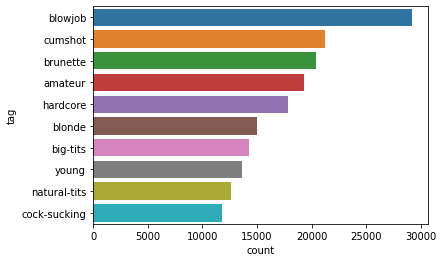

In [95]:
pd_tagsPopularity = pd.DataFrame(tagsPopularity.items(), columns=['tag', 'count'])
top10_tags = pd_tagsPopularity.sort_values(by='count', ascending=False).head(10)
sns.barplot(x=top10_tags['count'], y=top10_tags['tag']);

Top 10 Least Popular Video Uploads by Tags

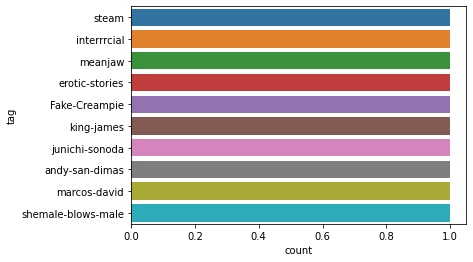

In [96]:
least10_tags = pd_tagsPopularity.sort_values(by='count', ascending=False).tail(10)
sns.barplot(x=least10_tags['count'], y=least10_tags['tag']);

Linear Relationship between each variable

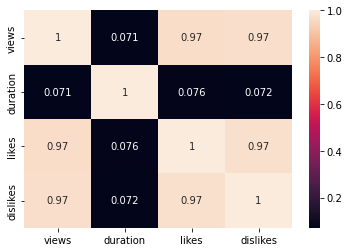

In [97]:
sns.heatmap(dataset[['views', 'duration', 'likes', 'dislikes']].corr(), annot=True);

Number of video taken by the pornstar

In [98]:
modelPopularity = Counter()
dataset['pornstars'].map(lambda x: modelPopularity.update(x.split(";")) if pd.notnull(x) else None)
f"number of pornstars are {len(modelPopularity)}"

'number of pornstars are 6248'

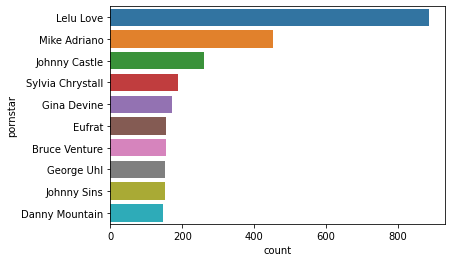

In [99]:
nVideoByPornstar = pd.DataFrame(modelPopularity.items(), columns=['pornstar', 'count']).sort_values(by='count', ascending=False).head(10)
sns.barplot(x=nVideoByPornstar['count'], y=nVideoByPornstar['pornstar']);

Video Views By Pornstar

In [100]:
c = Counter()
pornstarByVideoViews = dataset[dataset['pornstars'].notnull()]
pornstarByVideoViews = pornstarByVideoViews[['pornstars', 'views']]
for idx in range(len(pornstarByVideoViews)):
    info = pornstarByVideoViews.iloc[idx][['pornstars', 'views']]
    pornstars = info['pornstars'].split(';')
    for pornstar in pornstars:
        c[pornstar] += info['views']

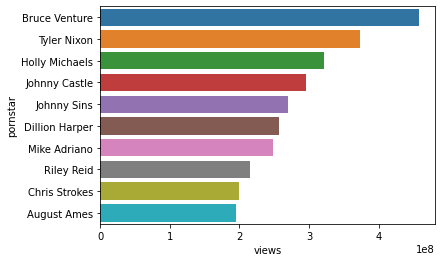

In [101]:
pornstarByVideoViews = pd.DataFrame(c.items(), columns=['pornstar', 'views'])
top10VideoViewsByPornstar = pornstarByVideoViews.sort_values(by='views', ascending=False).head(10)
sns.barplot(x=top10VideoViewsByPornstar['views'], y=top10VideoViewsByPornstar['pornstar']);

Video Views By Tags

In [103]:
c = Counter()
tagsByVideoViews = dataset[dataset['tags'].notnull()]
tagsByVideoViews = tagsByVideoViews[['tags', 'views']]
for idx in range(len(tagsByVideoViews)):
    info = tagsByVideoViews.iloc[idx][['tags', 'views']]
    tags = info['tags'].split(';')
    for tags in tags:
        c[tags] += info['views']

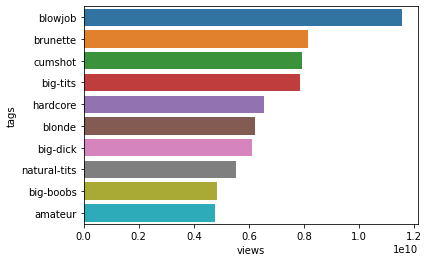

In [104]:
tagsByVideoViews = pd.DataFrame(c.items(), columns=['tags', 'views'])
top10VideoViewsByTags = tagsByVideoViews.sort_values(by='views', ascending=False).head(10)
sns.barplot(x=top10VideoViewsByTags['views'], y=top10VideoViewsByTags['tags']);